In [289]:
import codecs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import wget
import numpy as np
import pycountry as pc
import pycountry_convert as pcc 
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.graphics.api import abline_plot
import seaborn as sns 


# <u>GDP Per Capita Per Country (IMF)</u>

In [85]:
gdp18 = pd.read_csv('./Data/WEO_Data_ISO_3.xls' , sep='\t', thousands=',',usecols=['ISO','Country','2018'],encoding = "cp1252")
gdp18.columns = ['ISO3','Country','GDP_2018']


In [86]:
gdp18

,ISO3,Country,GDP_2018
0,AFG,Afghanistan,2016.889
1,ALB,Albania,13344.543
2,DZA,Algeria,15439.916
3,AGO,Angola,6814.331
4,ATG,Antigua and Barbuda,27981.256
...,...,...,...
189,VEN,Venezuela,NaN
190,VNM,Vietnam,7510.526
191,YEM,Yemen,2377.236
192,ZMB,Zambia,4103.500


In [127]:
def iso3toiso2(iso3):
    try:
        iso2 = pcc.country_alpha3_to_country_alpha2(iso3)
    except Exception:
        return pd.np.nan
    return iso2
        


gdp18['ISO2'] = gdp18['ISO3'].apply(iso3toiso2)
print(gdp18.isna().sum())
gdp18.dropna(inplace=True)
print(gdp18.isna().sum())
gdp18serie = pd.Series(gdp18['GDP_2018'].values,index=gdp18['ISO2'])
print(gdp18serie['NL'])
gdp18

ISO3        0
Country     0
GDP_2018    3
ISO2        1
dtype: int64
ISO3        0
Country     0
GDP_2018    0
ISO2        0
dtype: int64
56383.248


,ISO3,Country,GDP_2018,ISO2
0,AFG,Afghanistan,2016.889,AF
1,ALB,Albania,13344.543,AL
2,DZA,Algeria,15439.916,DZ
3,AGO,Angola,6814.331,AO
4,ATG,Antigua and Barbuda,27981.256,AG
...,...,...,...,...
188,VUT,Vanuatu,2861.826,VU
190,VNM,Vietnam,7510.526,VN
191,YEM,Yemen,2377.236,YE
192,ZMB,Zambia,4103.500,ZM


# <u>GCI 2018</u>

In [129]:
gci18 = pd.read_csv('./Data/GCI_2018_ISO_2.csv',names=['ISO2','Country','Score'],skiprows=1)
gci18.dropna(inplace=True)
gci18serie = pd.Series(gci18['Score'].values,index=gci18['ISO2'])
print(gci18serie['NL'])
gci18


0.885


,ISO2,Country,Score
0,GB,United Kingdom,0.931
1,US,United States of America,0.926
2,FR,France,0.918
3,LT,Lithuania,0.908
4,EE,Estonia,0.905
...,...,...,...
189,DM,Dominica,0.019
190,YF,Yemen,0.019
191,KM,Comoros,0.015
192,CD,Democratic People's Republic of the Congo,0.008


In [130]:
gci18.isna().sum()

ISO2       0
Country    0
Score      0
dtype: int64

# <u>IPv4 Addresses per country</u>

In [6]:
ip_per_country = pd.read_csv('./Data/IPv4_per_country_2018_ISO_2.csv',usecols=['Country Code','Country Name', 'Total IPs'],dtype={'Country Code':str,'Country Name':str},thousands=',')
ip_per_country.columns=['ISO2','Country','TotalIP']
ip_per_country.sort_values(by='TotalIP',ascending=False).head(20)



,ISO2,Country,TotalIP
0,US,UNITED STATES,1220338410
1,CN,CHINA,338199611
2,JP,JAPAN,206066287
3,GB,UNITED KINGDOM,123269598
4,DE,GERMANY,123058389
5,KR,KOREA REPUBLIC OF,112574647
6,BR,BRAZIL,84134964
7,FR,FRANCE,82982194
8,CA,CANADA,69944236
9,IT,ITALY,54399039


# <u>Telnet</u>

In [8]:
dftel_list = []
dftel_list.append(pd.read_csv('./Data/Rapid7/Telnet/telnet2018_1.csv',usecols=['timestamp_ts','saddr','country']))
dftel_list.append(pd.read_csv('./Data/Rapid7/Telnet/telnet2018_2.csv',usecols=['timestamp_ts','saddr','country']))
dftel18 = pd.concat(dftel_list)

In [14]:
# dftel18 = dftel18.drop(columns='Unnamed: 0')
dftel18 = dftel18.reset_index(drop=True)
dftel18.columns=['ts','saddr','ISO2']
dftel18['ts'] = pd.to_datetime(dftel18['ts']).dt.month

In [22]:
dftel18.ISO2.nunique()

240

In [38]:
dftel18.isna().sum()

ts           0
saddr        0
ISO2     73968
dtype: int64

In [18]:
# df_Test.reset_index(inplace=True,drop=True)
# df_Test
count_telnet = dftel18.groupby(['ISO2']).size().to_frame('country_count').reset_index()

In [23]:
count_telnet=count_telnet.sort_values(['country_count'],ascending=[False])
count_telnet['country_count_avg'] = count_telnet['country_count'].divide(12)
count_telnet

,ISO2,country_count,country_count_avg
45,CN,19294679,1.607890e+06
222,US,16317943,1.359829e+06
11,AU,4567786,3.806488e+05
29,BR,3644610,3.037175e+05
91,HK,3362088,2.801740e+05
...,...,...,...
225,VA,23,1.916667e+00
157,NF,23,1.916667e+00
164,NU,7,5.833333e-01
36,CC,4,3.333333e-01


In [37]:
count_telnet.isna().sum()

ISO2                 0
country_count        0
country_count_avg    0
dtype: int64

In [64]:
print(count_telnet[count_telnet['ISO2'] == 'FK']) 

   ISO2  country_count  country_count_avg
68   FK          22127        1843.916667


# <u>UPnP</u>

In [25]:
dfupnp18 = pd.read_csv('./Data/Rapid7/UPnP/upnp2018.csv', usecols=['timestamp_ts','saddr','country'])

In [26]:
dfupnp18.columns=['ts','saddr','ISO2']
dfupnp18['ts'] = pd.to_datetime(dfupnp18['ts']).dt.month

In [39]:
print(dfupnp18['ISO2'].nunique())
print(dfupnp18.isna().sum())

228
ts          0
saddr       0
ISO2     1184
dtype: int64


In [28]:
count_upnp = dfupnp18.groupby(['ISO2']).size().to_frame('country_count').reset_index()
count_upnp= count_upnp.sort_values(['country_count'],ascending=[False])

In [29]:
count_upnp['country_count_avg'] = count_upnp['country_count'].divide(12)
count_upnp

,ISO2,country_count,country_count_avg
42,CN,3623353,301946.083333
172,RU,1764443,147036.916667
7,AR,1216501,101375.083333
210,US,1117729,93144.083333
206,TW,1113192,92766.000000
...,...,...,...
195,TD,3,0.250000
224,YT,3,0.250000
46,CV,2,0.166667
180,SH,1,0.083333


# <u>Normalize</u>

In [30]:
def intersect(x: pd.Series, y: pd.Series) -> (pd.Series,pd.Series):
    intersection = x.index.intersection(y.index)
    
    # Take the values that are in the intersection index
    x_intersec = x[intersection]
    y_intersec = y[intersection]
    
    return x_intersec,y_intersec
    

In [495]:
telnetserie = pd.Series(count_telnet['country_count_avg'].values,index=count_telnet['ISO2'])
upnpserie = pd.Series(count_upnp['country_count_avg'].values,index=count_upnp['ISO2'])
ipv4serie = pd.Series(ip_per_country['TotalIP'].values,index=ip_per_country['ISO2'])
intersec_upnp = intersect(upnpserie,ipv4serie)
intersec_telnet = intersect(telnetserie,ipv4serie)

In [352]:
normalized_telnet = pd.Series()
normalized_upnp = pd.Series()

for index, value in intersec_telnet[0].items():
    if not pd.isnull(index) and intersec_telnet[1][index] != 0:
        normalized_telnet[index] = value / intersec_telnet[1][index]
#     print("Index : " + str(index) + ", value : " + str(value))

for index, value in intersec_upnp[0].items():
    if not pd.isnull(index) and intersec_upnp[1][index] != 0:
        normalized_upnp[index] = value / intersec_upnp[1][index]
#     print("Index : " + str(index) + ", value : " + str(value))


normalized_telnet.sort_values(inplace=True)
normalized_upnp.sort_values(inplace=True)


# <u>Linear Regression</u>

In [357]:
normalized_telnet_fix = normalized_telnet.drop(['FK','SY','VC','FM'])
print(normalized_telnet_fix)
# normalized_telnet_fix = np.log(normalized_telnet_fix)

VA    0.000115
LY    0.000162
NU    0.000285
KI    0.000306
NR    0.000330
        ...   
SS    0.040744
SZ    0.048213
NC    0.050290
AX    0.055650
GU    0.066856
Length: 234, dtype: float64


In [316]:
def endog_exog(tel,gdp,gci,upnp):

    exog = []
    endog = []
    for index, value in tel.items():
        if index in gdp.index.to_list() and index in gci.index.to_list() and index in upnp.index.to_list():
            if tel[index] != np.nan and gdp[index] != np.nan and gci[index] != np.nan and upnp[index] != np.nan:
                sub_exog = []

                sub_exog.append(gdp[index])
                sub_exog.append(gci[index])
                sub_exog.append(upnp[index])
                exog.append(sub_exog)
                endog.append(tel[index])

    # print(type(exog[0][0]))
    # print(exog[0][0])
    # print(exog)
    # print(endog)
    # print(len(exog))
    # print(len(endog))
    exog = pd.DataFrame(exog, columns=['GDP','GCI','UPnP'])
    endog = pd.DataFrame(endog,columns=['Telnet'])
    return endog, exog

# print(exog)
# print(endog)

# print(pd.concat([exog,endog],axis=1))
# total =pd.concat([exog,endog],axis=1)
# print(total.corr(method='spearman'))
# print(stats.spearmanr(total['GDP'],total['Telnet']))
# print(stats.spearmanr(total['GCI'],total['Telnet']))
# print(stats.spearmanr(total['UPnP'],total['Telnet']))

0.00016175845303458857

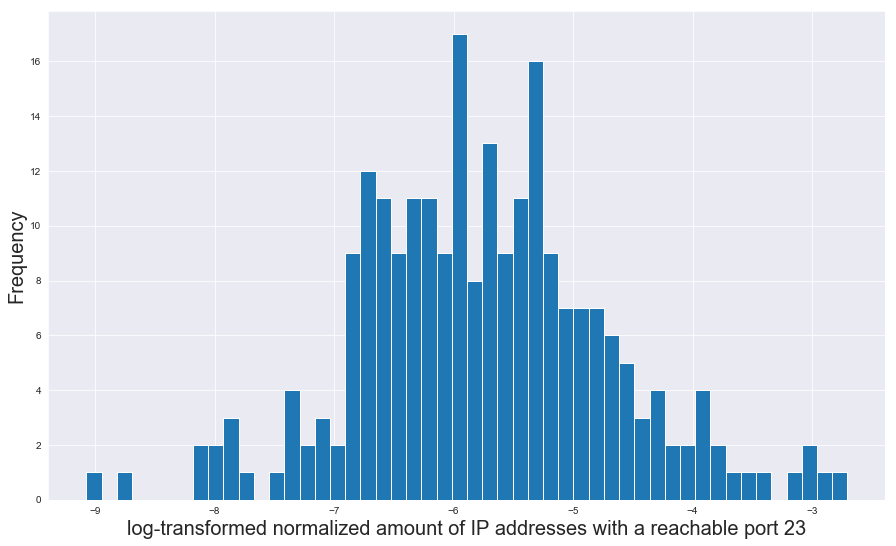

In [471]:
axlog = np.log(normalized_telnet_fix).hist(bins=50)
axlog.set_ylabel('Frequency',fontsize=20)
axlog.set_xlabel('log-transformed normalized amount of IP addresses with a reachable port 23',fontsize=20)
# axreg = normalized_telnet_fix.hist(bins=50)
# axreg.set_ylabel('Frequency',fontsize=20)
# axreg.set_xlabel('normalized amount of IP addresses with a reachable port 23',fontsize=20)
figlog = axlog.get_figure()
# figreg = axreg.get_figure()


figlog.savefig('./histlog')
# figreg.savefig('./histreg')

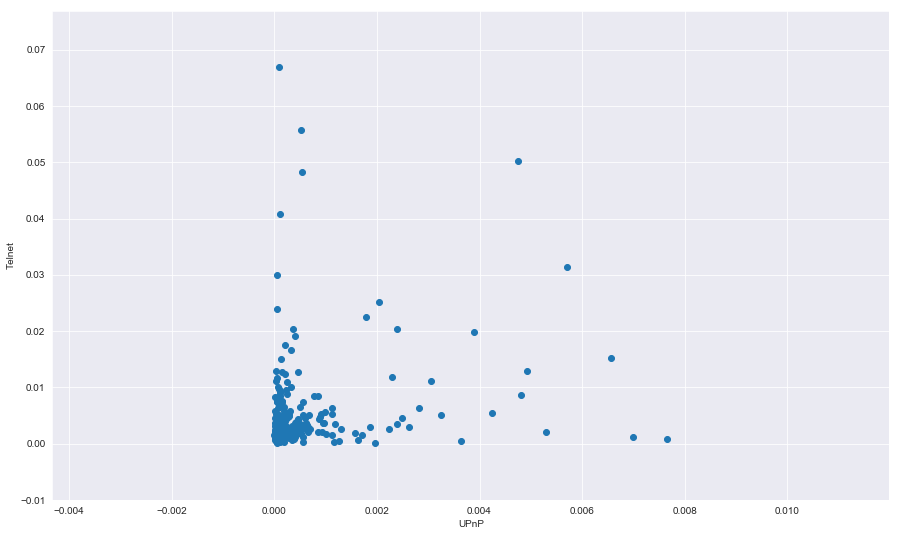

In [456]:
tel_upnp_intersec = intersect(normalized_telnet_fix,normalized_upnp)
tel_upnp_exog = []
tel_upnp_endog = []
for index , values in tel_upnp_intersec[0].items():
    tel_upnp_endog.append(tel_upnp_intersec[0][index])
    tel_upnp_exog.append(tel_upnp_intersec[1][index])
    
tel_upnp_exog=pd.DataFrame(tel_upnp_exog,columns=['UPnP'])
tel_upnp_endog=pd.DataFrame(tel_upnp_endog,columns=['Telnet'])

plt.scatter(tel_upnp_exog,tel_upnp_endog)
plt.xlabel("UPnP")
plt.ylabel("Telnet")
plt.show()
    

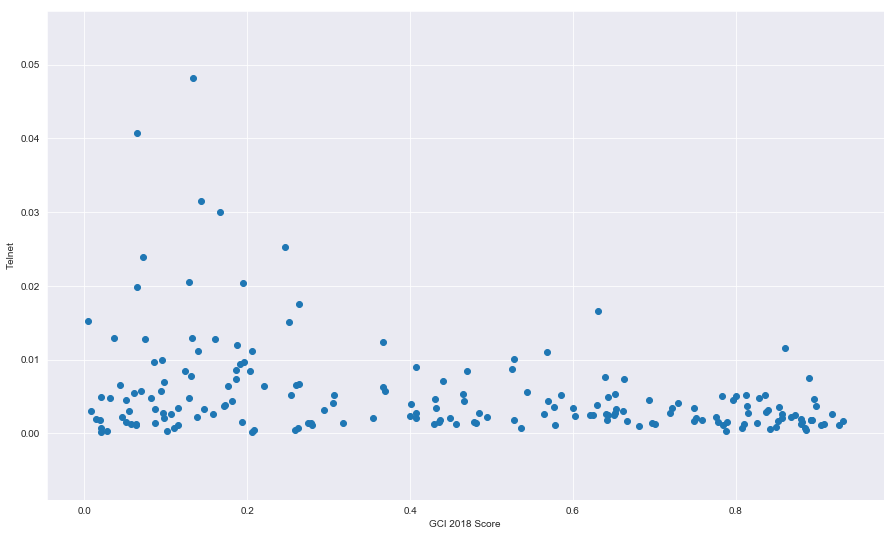

In [457]:
tel_gci_intersec = intersect(normalized_telnet_fix,gci18serie)

tel_gci_exog = []
tel_gci_endog = []

for index , values in tel_gci_intersec[0].items():
    tel_gci_endog.append(tel_gci_intersec[0][index])
    tel_gci_exog.append(tel_gci_intersec[1][index])
    

tel_gci_exog=pd.DataFrame(tel_gci_exog,columns=['GCI'])
tel_gci_endog=pd.DataFrame(tel_gci_endog,columns=['Telnet'])
plt.scatter(tel_gci_exog,tel_gci_endog)
plt.xlabel("GCI 2018 Score")
plt.ylabel("Telnet")
plt.show()
    

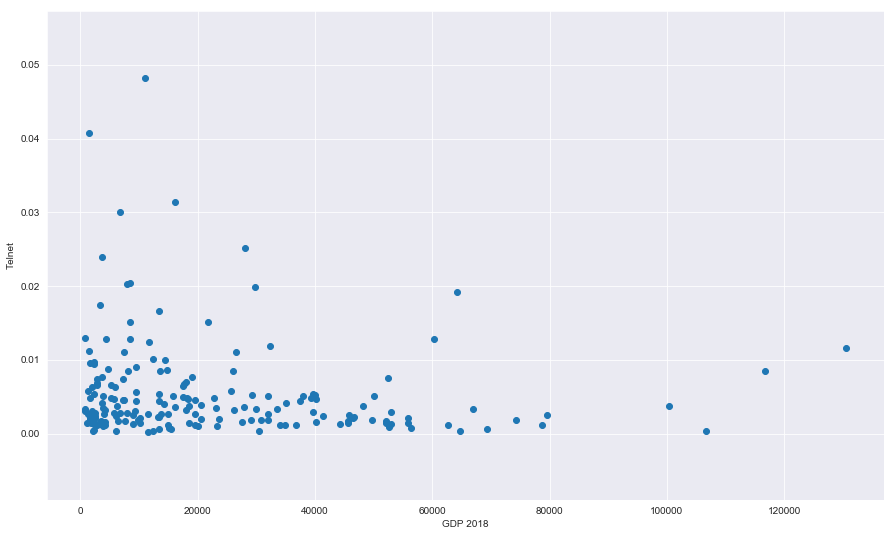

In [458]:
tel_gdp_intersec = intersect(normalized_telnet_fix,gdp18serie)

tel_gdp_exog = []
tel_gdp_endog = []

for index , values in tel_gdp_intersec[0].items():
    tel_gdp_endog.append(tel_gdp_intersec[0][index])
    tel_gdp_exog.append(tel_gdp_intersec[1][index])
    
tel_gdp_exog=pd.DataFrame(tel_gdp_exog,columns=['GDP'])
tel_gdp_endog=pd.DataFrame(tel_gdp_endog,columns=['Telnet'])

plt.scatter(tel_gdp_exog,tel_gdp_endog)
plt.xlabel("GDP 2018")
plt.ylabel("Telnet")
plt.show()

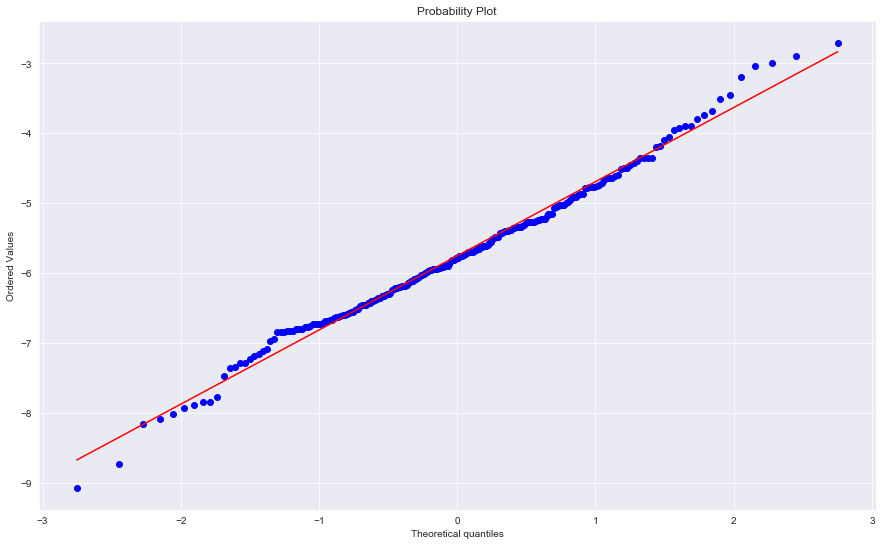

In [501]:
from sklearn.datasets.samples_generator import make_regression
x1, y1 = make_regression(n_samples=100, n_features=1, noise=10)


stats.probplot(np.log(normalized_telnet_fix), dist="norm", plot=plt)
plt.show()



SpearmanrResult(correlation=-0.1874404875261855, pvalue=0.012480887244070584)
SpearmanrResult(correlation=-0.32905524652408097, pvalue=7.75089322722406e-06)
SpearmanrResult(correlation=0.21296809265767558, pvalue=0.004427152313899868)
                                 OLS Regression Results                                
Dep. Variable:                 Telnet   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.502
Method:                 Least Squares   F-statistic:                              179.1
Date:                Sat, 16 Nov 2019   Prob (F-statistic):                    1.27e-28
Time:                        14:57:53   Log-Likelihood:                         -499.66
No. Observations:                 177   AIC:                                      1001.
Df Residuals:                     176   BIC:                                      1004.
Df Model:                           1                        

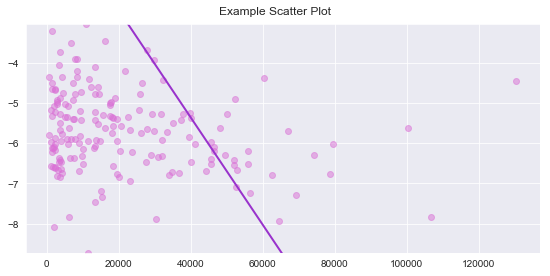

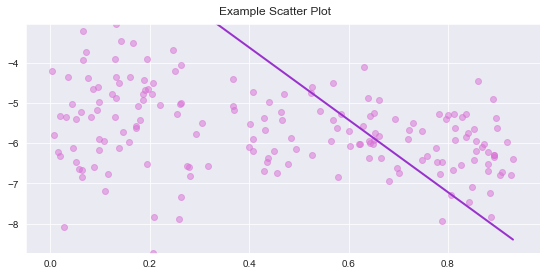

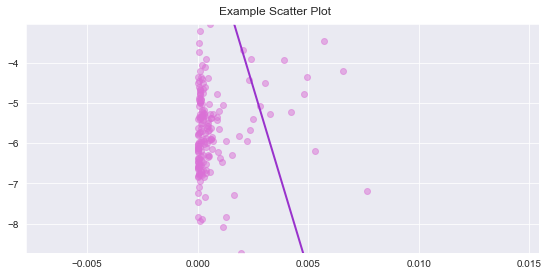

In [498]:
endog_log, exog_log = endog_exog(np.log(normalized_telnet_fix), np.log(gdp18serie),np.log(gci18serie), np.log(normalized_upnp))
endog, exog = endog_exog(normalized_telnet_fix, gdp18serie,gci18serie, normalized_upnp)

total =pd.concat([exog,endog],axis=1)

print(stats.spearmanr(total['GDP'],total['Telnet']))
print(stats.spearmanr(total['GCI'],total['Telnet']))
print(stats.spearmanr(total['UPnP'],total['Telnet']))



total['Telnet'] = np.log(total['Telnet'])



def reg(dep,indep):
    
    # x = np.random.randn(100)

    # y = x + np.random.randn(100) + 10
    y = dep
    x = indep
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(x, y, alpha=0.5, color='orchid')
    fig.suptitle('Example Scatter Plot')
    fig.tight_layout(pad=2); 
    ax.grid(True)
    fig.show

    model = sm.OLS(y, x)
    fitted = model.fit()
    x_pred = np.linspace(x.min(), x.max(), 50)
  
    y_pred = fitted.predict(x_pred)

    ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)
    ax.set_ylim(y.min(), y.max())
    fig.show()
    print(fitted.summary())
    
reg(total['Telnet'],total['GDP'])
reg(total['Telnet'],total['GCI'])
reg(total['Telnet'],total['UPnP'])